In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
data = fetch_california_housing()
type(data)

sklearn.utils._bunch.Bunch

In [8]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [25]:
df['MedHouseVal'] = data.target
df['MedHouseVal']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20637    0.923
20638    0.847
20639    0.894
20640      NaN
20641      NaN
Name: MedHouseVal, Length: 20642, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20642 entries, 0 to 20641
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20642 non-null  float64
 1   HouseAge     20642 non-null  float64
 2   AveRooms     20642 non-null  float64
 3   AveBedrms    20642 non-null  float64
 4   Population   20642 non-null  float64
 5   AveOccup     20642 non-null  float64
 6   Latitude     20642 non-null  float64
 7   Longitude    20642 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [27]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20642.000000,20642.000000,20642.000000,20642.000000,20642.000000,20642.000000,20642.000000,20642.000000,20640.000000
mean,3.871101,28.639715,5.429421,1.096666,1425.470545,3.070584,35.632078,-119.569962,2.068558
std,1.900233,12.585354,2.474003,0.473889,1132.453659,10.385549,2.135963,2.003605,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563750,18.000000,4.441144,1.006067,787.000000,2.429649,33.930000,-121.800000,1.196000
50%,3.534950,29.000000,5.230373,1.048780,1166.000000,2.818016,34.260000,-118.490000,1.797000
75%,4.743700,37.000000,6.052460,1.099520,1725.000000,3.282249,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [28]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    2
dtype: int64

### Introducing few issues in the dataset

Since the dataset is not having any outliers and null values, I am inserting it deliberately into the dataset for learning purpose

In [29]:
df.loc[10:20, 'AveRooms'] = np.nan #nulls

In [30]:
df = pd.concat([df, df.iloc[0:5]], ignore_index=True) #duplicates
#ignore index true - resets the index of the duplicated records

In [31]:
df.loc[0, 'MedHouseVal'] = 10
df.loc[1, 'MedHouseVal'] = 10 #outliers

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20647 entries, 0 to 20646
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20647 non-null  float64
 1   HouseAge     20647 non-null  float64
 2   AveRooms     20636 non-null  float64
 3   AveBedrms    20647 non-null  float64
 4   Population   20647 non-null  float64
 5   AveOccup     20647 non-null  float64
 6   Latitude     20647 non-null  float64
 7   Longitude    20647 non-null  float64
 8   MedHouseVal  20645 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [33]:
df.isnull().sum()

MedInc          0
HouseAge        0
AveRooms       11
AveBedrms       0
Population      0
AveOccup        0
Latitude        0
Longitude       0
MedHouseVal     2
dtype: int64

### Handling missing values

In [34]:
df['AveRooms'].fillna(df['AveRooms'].mean(), inplace=True)

#imputing with the mean itself

C:\Users\Datacell\AppData\Local\Temp\ipykernel_25080\3200740120.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AveRooms'].fillna(df['AveRooms'].mean(), inplace=True)


In [40]:
df = df.dropna(subset=['MedHouseVal'])

In [41]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### Handling duplicates

In [42]:
print("duplicates: ", df.duplicated().sum())

duplicates:  3


In [43]:
df = df.drop_duplicates()

## EDA

Text(0.5, 1.0, 'Correlation matrix')

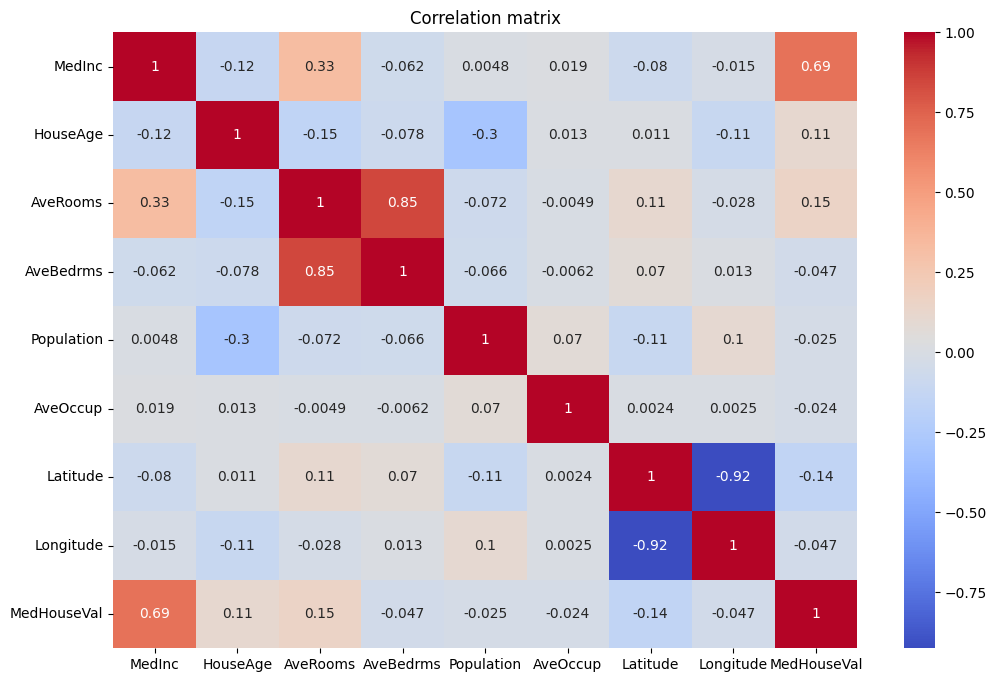

In [44]:
# Correlation heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')

MedInc has the highest correlation with MedHouseVal (~0.69).

Geographic features (Latitude, Longitude) have low correlation.

AveRooms and AveBedrms are correlated (~0.85) → potential multicollinearity.

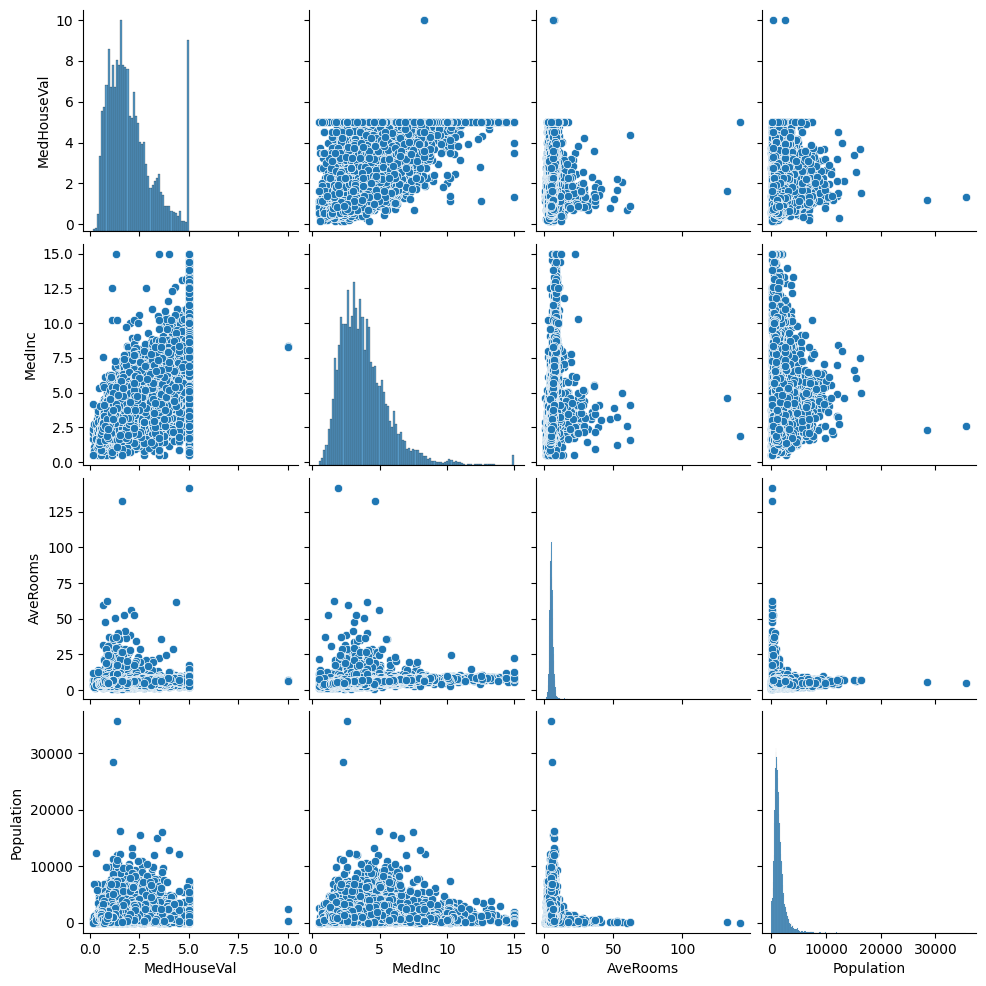

In [45]:
sns.pairplot(df[['MedHouseVal', 'MedInc', 'AveRooms', 'Population']])

Text(0.5, 1.0, 'outliers in target')

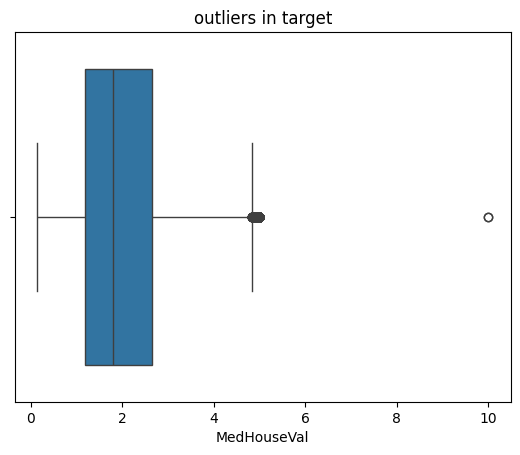

In [46]:
sns.boxplot(x=df['MedHouseVal'])
plt.title('outliers in target')

### Outlier handling

In [47]:
q1 = df['MedHouseVal'].quantile(0.25)
q3 = df['MedHouseVal'].quantile(0.75)
iqr = q3 - q1

In [49]:
df = df[(df['MedHouseVal'] >= q1 - 1.5*iqr) & (df['MedHouseVal'] <= q3 + 1.5*iqr)]

Text(0.5, 1.0, 'outliers in target')

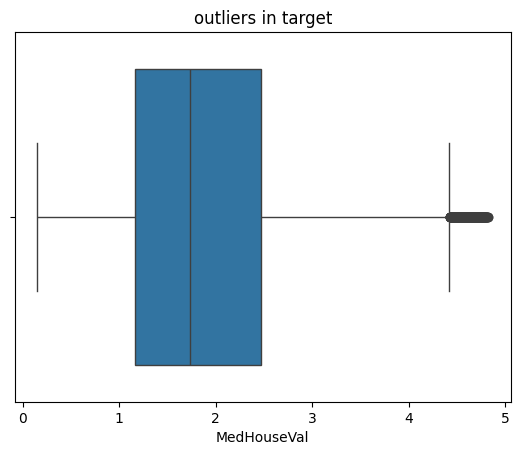

In [50]:
sns.boxplot(x=df['MedHouseVal'])
plt.title('outliers in target')

### Feature selection

In [51]:
x = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]
y = df['MedHouseVal']

## train/ test split

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=9)

In [53]:
# scaling features

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

## Linear regression

In [54]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
ypred = lr.predict(xtest)

In [56]:
print("R2 score: ", r2_score(ytest, ypred))

R2 score:  0.4710130794525822


In [57]:
print("RMSE: ", np.sqrt(mean_squared_error(ytest, ypred)))

RMSE:  0.683734433126584


### Regularisation

In [63]:
ridgeCV = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
ridgeCV.fit(xtrain, ytrain)
print("Best alpha for Ridge: ", ridgeCV.alpha_)

Best alpha for Ridge:  100.0


In [64]:
ridge = Ridge(alpha=100)

In [79]:
ridge.fit(xtrain, ytrain)
yRidge = ridge.predict(xtest)
print("Ridge R2: ", r2_score(ytest, yRidge))
print("Ridge RMSE: ", np.sqrt(mean_squared_error(ytest, yRidge)))

Ridge R2:  0.4746590035002728
Ridge RMSE:  0.6813741157694737


In [ ]:
lassoCV = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5, max_iter=10000)
lassoCV.fit(xtrain, ytrain)
print("Best alpha for Lasso: ", lassoCV.alpha_)

Best alpha for Lasso:  0.1


In [67]:
lasso = Lasso(alpha=0.1)

In [78]:
lasso.fit(xtrain, ytrain)
yLasso = lasso.predict(xtest)
print("Lasso R2: ", r2_score(ytest, yLasso))
print("RMSE lasso: ", np.sqrt(mean_squared_error(ytest, yLasso)))

Lasso R2:  0.4156574604549559
RMSE lasso:  0.7186190676884945


# By comparing the R2 score and RMSE, we can see that Ridge is apt for this (highest R2, lowest RMSE)

## Polynomial regression

We can find the features showing dependency from correlation matrix or also using VIF 

In [69]:
# finding multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
dfX = pd.DataFrame(xtrain, columns=[f'feature{i}' for i in range(xtrain.shape[1])])

In [ ]:
dfX # adding all the scaled feature values

,feature0,feature1,feature2,feature3,feature4,feature5
0,0.250147,-0.192493,-0.029658,-0.358159,0.812838,0.060914
1,1.047475,0.526797,0.203675,-0.281575,-0.386955,-0.040252
2,-0.385422,-0.672019,-0.066319,-0.018999,0.476175,0.074413
3,-1.259958,1.405929,-1.029283,0.037564,0.088840,-0.062982
4,0.033010,1.645692,0.408622,0.541578,-0.804350,-0.045204
...,...,...,...,...,...,...
15651,-0.185479,1.565771,-0.271159,-0.119647,0.366244,0.109066
15652,-0.961685,0.846481,-1.267406,-0.195493,0.356796,0.213108
15653,-0.978363,0.926402,-0.700200,-0.180917,0.608435,0.169402
15654,3.026755,-1.151545,1.023060,-0.233466,0.501081,0.074682


In [73]:
vifData = pd.DataFrame()
vifData['features'] = dfX.columns
vifData['VIF'] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
print(vifData)

# as expected average rooms and average bedrooms are haivng values more than 5

   features       VIF
0  feature0  2.103706
1  feature1  1.173679
2  feature2  6.080461
3  feature3  5.275073
4  feature4  1.123912
5  feature5  1.005535


### Using cross validation to find the apt degree for polynomial regression

In [75]:
deg = [1,2,3,4,5]
cvScores = []

for d in deg:
    poly = PolynomialFeatures(degree=d)
    xPoly = poly.fit_transform(xtrain)
    lr = LinearRegression()
    score = cross_val_score(lr, xPoly, ytrain, cv=5, scoring='r2').mean()
    cvScores.append(score)

bestDegree = deg[np.argmax(cvScores)]
print("Best degree: ", bestDegree)
print("cv score: ", cvScores)

Best degree:  1
cv score:  [np.float64(-0.4355414208187593), np.float64(-1046.8254410252875), np.float64(-7757902.594715494), np.float64(-313458559508.5133), np.float64(-28837895046296.77)]


Text(0.5, 1.0, 'Choosing Polynomial Degree')

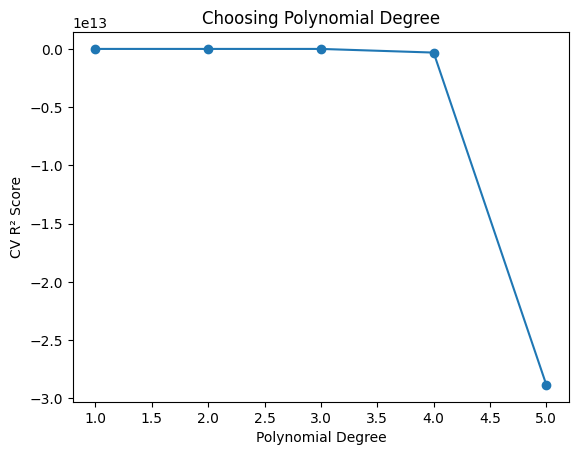

In [77]:
plt.plot(deg, cvScores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('CV R² Score')
plt.title('Choosing Polynomial Degree')